# This notebook is for IO of .nwb files obtained from the multipatch rig, using MIES.
1. --It makes use of Luke Campagnola's "neuroanalysis" package, because dealing with multipatch/multielectrode .nwb. files can be trickier.  
--You will need to get this package: https://github.com/aiephys/neuroanalysis

2. I (Soo) work with two files: the actual .nwb file, and a .json file describing the sweeps, electrodes, etc.
The "50" indicates that the .nwb file's sampling rate is 50KHz. 

"D:/temp 50KHz/2019_02_21_115708_50_compressed.nwb"   
"2019_02_21_115708_50.json file"

# Raw data extraction

In [ ]:
# For files from MIES-multipatch, use Luke's codes to process the .nwb file
# I think? due to some issues with alignment of metadata and data?

In [12]:
from neuroanalysis.miesnwb import MiesNwb

myfile = MiesNwb("D:/temp 50KHz/2019_02_21_115708_50_compressed.nwb")

In [30]:
# the nwb file will have lots of sweeps (experiments), many electrodes, and primary output (ephys hardware-specific setting)
# this information is in the .json file associated with the .nwb file

# pick sweep number, electrode id, the recording output
sweep_id = 80 
el_id_intra = 5
el_id_extraclose = 7

intra_trace = myfile.contents[sweep_id][el_id_intra]['primary']
ex_trace = myfile.contents[sweep_id][el_id_extraclose]['primary']

In [31]:
# raw data, in uV
intra_trace.data

array([-0.0635375 , -0.06353125, -0.063525  , ..., -0.066025  ,
       -0.0660125 , -0.06600625], dtype=float32)

In [38]:
# time, in seconds
intra_trace.time_values

array([0.000000e+00, 2.000000e-05, 4.000000e-05, ..., 1.499994e+01,
       1.499996e+01, 1.499998e+01])

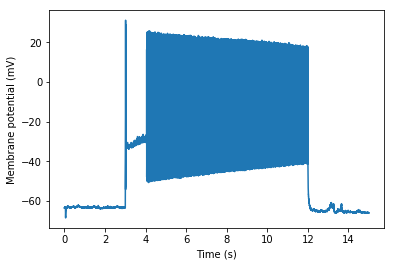

In [50]:
# simple plot of spiking electrode

import matplotlib.pyplot as plt
in_x=intra_trace.time_values
in_y=(intra_trace.data)*1000
plt.plot(in_x,in_y)
plt.xlabel("Time (s)") 
plt.ylabel("Membrane potential (mV)")
plt.show()

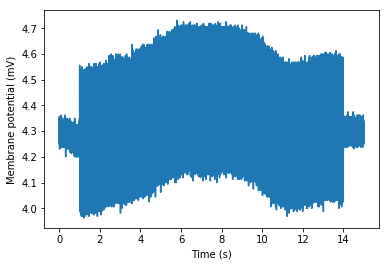

In [53]:
# simple plot of extracellular recording electrode

ex_x=ex_trace.time_values
ex_y=(ex_trace.data)*1000
plt.plot(ex_x,ex_y)
plt.xlabel("Time (s)") 
plt.ylabel("Membrane potential (mV)")
plt.show()


# Getting information about stimulus

In [ ]:
# This is not directly looking at the data--it is actually looking directly into the details of the stimulus given

In [19]:
# get stimset name
myfile.contents[sweep_id][el_id].stimulus.description

u'TPsupraSpikeCell_DA_0'

In [ ]:
import matplotlib.image as mpimg
stim_in_image = mpimg.imread("G:/20190229_coding_mtg/Stimset_intracellular.PNG")
plt.figure(figsize=(200,100))
plt.imshow(stim_in_image)
plt.show()

In [24]:
# get stimset amplitude
# you need to specify "epoch" you're interested in (this is specific to how stimuluses are designed in MIES)
# 

epoch = 4
myfile.contents[sweep_id][el_id].stimulus.items[4].amplitude * (1e12)

<SquarePulse "Epoch 3" 0x32d1add8>

In [27]:
# get stimset frequency
# note that a square pulse will give you an error message because it has no frequency

myfile.contents[sweep_id][el_id].stimulus.items[epoch].frequency

AttributeError: 'SquarePulse' object has no attribute 'frequency'

In [28]:
# get start time of the particular epoch, in seconds
myfile.contents[sweep_id][el_id].stimulus.items[epoch].global_start_time

3.0